In [1051]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
sns.set() #make the graphs prettier

In [1052]:
test = pd.read_csv("./input/test.csv")
train = pd.read_csv("./input/train.csv")

data_cleaner = [train, test]

In [1053]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


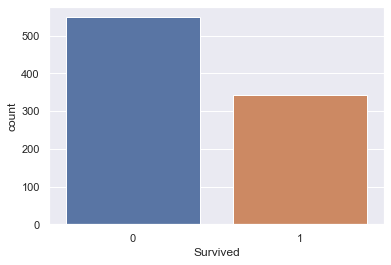

In [1054]:
sns.countplot('Survived',data=train)

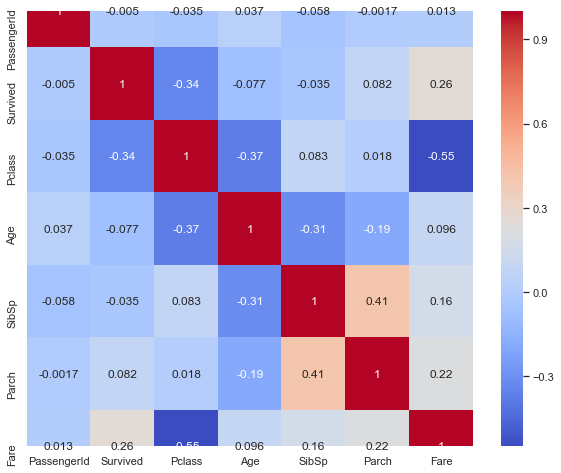

In [1055]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

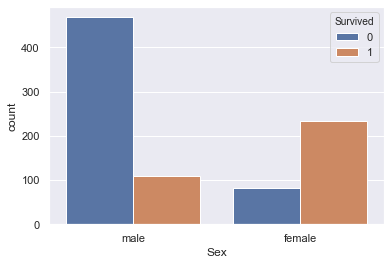

In [1056]:
sns.countplot('Sex',hue='Survived',data=train)

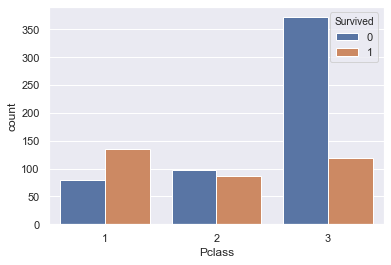

In [1057]:
sns.countplot('Pclass',hue='Survived',data=train)

In [1058]:
for data in data_cleaner:
    print(data.isnull().sum())
    print('\n')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64




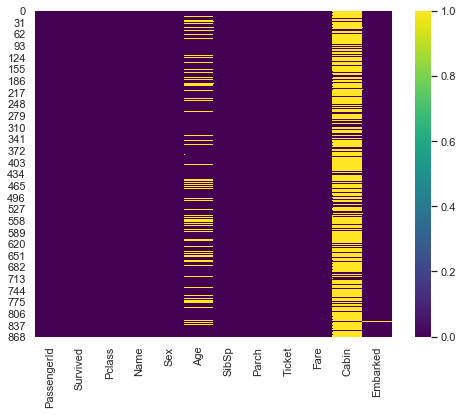

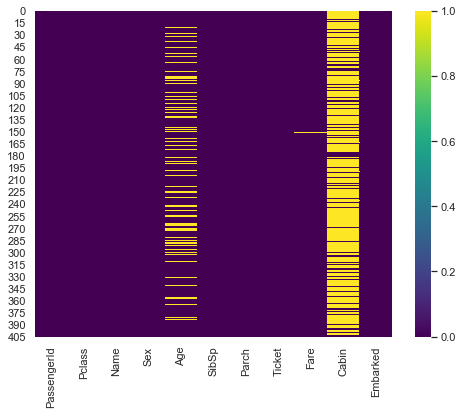

In [1059]:
for data in data_cleaner:
    plt.figure(figsize=(8,6))
    sns.heatmap(data.isnull(),cmap='viridis')

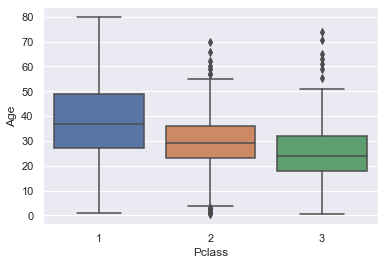

In [1060]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [1061]:
age_ref = pd.DataFrame(data=[train.groupby('Pclass')['Age'].mean()],columns=train['Pclass'].unique())
age_ref

,3,1,2
Age,25.14062,38.233441,29.87763


In [1062]:
def fill_age(pclass,age):
    if pd.isnull(age):
        return float(age_ref[pclass])
    else:
        return age

for data in data_cleaner:
    data['Age'] = train.apply(lambda x: fill_age(x['Pclass'],x['Age']), axis=1)

In [1063]:
def fill_fare(fare):
    if pd.isnull(fare):
        return train['Fare'].mean()
    else:
        return fare
    
def fill_embark(embark):
    if pd.isnull(embark):
        return train['Embarked'].mode().iloc[0]
    else:
        return embark
    
for data in data_cleaner:
    data['Fare'] = train.apply(lambda x: fill_fare(x['Fare']), axis=1)
    data['Embarked'] = train.apply(lambda x: fill_embark(x['Embarked']), axis=1)

In [1064]:
for data in data_cleaner:
    data.drop(['Cabin'],axis=1,inplace=True)

In [1065]:
for data in data_cleaner:
    print(data.isnull().sum())
    print('\n')

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64




In [1066]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [1067]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [1068]:
title_list = list()
for data in data_cleaner:
    for title in data['Name']:
        title = title.split('.')[0].split(',')[1]
        title_list.append(title)
    
    data['Title'] = title_list
    title_list = list()

In [1069]:
for data in data_cleaner:
    print(data['Title'].value_counts())
    print('\n')

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Don               1
 Mme               1
 Ms                1
 Jonkheer          1
 Sir               1
 Capt              1
 Lady              1
 the Countess      1
Name: Title, dtype: int64


 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Dona        1
 Ms          1
 Dr          1
Name: Title, dtype: int64




In [1070]:
train['Title'] = train['Title'].replace([ ' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], 'Others')
train['Title'].value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Others      27
Name: Title, dtype: int64

In [1071]:
test['Title'] = test['Title'].replace([ ' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer',' Dona'], 'Others')
test['Title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
Others       7
Name: Title, dtype: int64

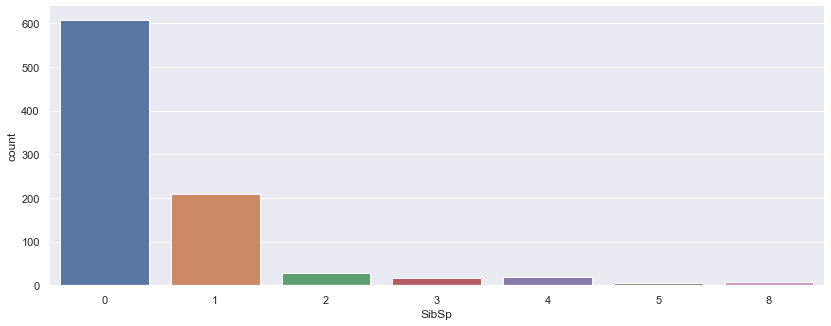

In [1072]:
sns.catplot(x="SibSp",kind="count", data=train, height=4.7, aspect=2.45)

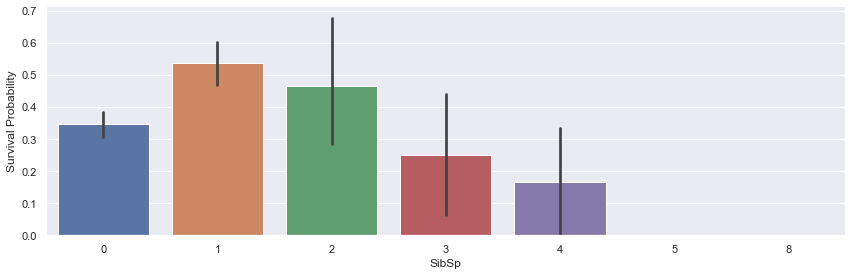

In [1073]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=train, height=4, aspect=3).set_ylabels("Survival Probability")

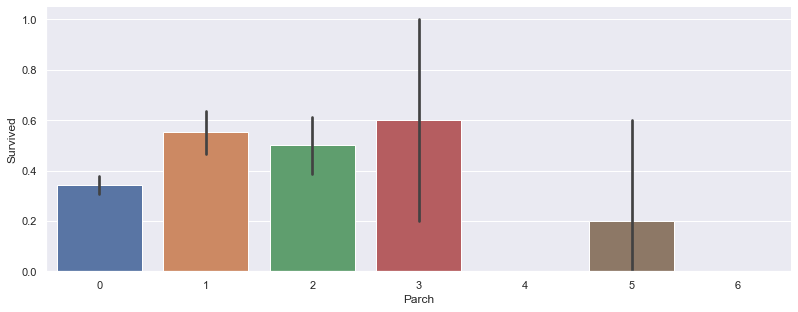

In [1074]:
sns.catplot(x="Parch", y='Survived',kind="bar", data=train, height=4.5, aspect=2.5)

In [1075]:
def get_size(df):
    if df['SibSp'] + df['Parch'] + 1 == 1:
        return 'Single'
    if df['SibSp'] + df['Parch'] + 1 > 1:
        return 'Small'
    if df['SibSp'] + df['Parch'] + 1 > 4:
        return 'Big'
    
for data in data_cleaner:
    data['FamilySize'] = data.apply(get_size,axis=1)

for data in data_cleaner:
    data['IsAlone'] = 1 
    data['IsAlone'].loc[data['FamilySize'] != 'Single'] = 0

/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [1076]:
train["AgeBand"] = pd.cut(train["Age"], 4)
train[["AgeBand", "Survived"]].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.364769
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80.0]",0.227273


In [1077]:
def setAge(val):
    if val < 20.315: result = 3
    elif val < 40.21: result = 2
    elif val < 60.105: result = 1
    else: result = 0
    return result

In [1078]:
train["Age"] = train["Age"].apply(setAge)
test["Age"] = test["Age"].apply(setAge)
train = train.drop(columns=["AgeBand"], axis=1)

In [1079]:
train["FareBand"] = pd.cut(train["Fare"], 4)
train[["FareBand", "Survived"]].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [1080]:
def setFare(val):
    result = 0
    if val < 128.082: result = 0
    elif val < 256.165: result = 1
    elif val < 384.247: result = 2
    else: result = 3
    return result

train["Fare"] = train["Fare"].apply(setFare)
test["Fare"] = test["Fare"].apply(setFare)

train = train.drop(columns=["FareBand"], axis=1)

In [1081]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
title = pd.get_dummies(train['Title'],drop_first=True)
Pclass = pd.get_dummies(train['Pclass'],drop_first=True)
FamilySize = pd.get_dummies(train['FamilySize'],drop_first=True)

sex2 = pd.get_dummies(test['Sex'],drop_first=True)
embark2 = pd.get_dummies(test['Embarked'],drop_first=True)
title2 = pd.get_dummies(test['Title'],drop_first=True)
Pclass2 = pd.get_dummies(test['Pclass'],drop_first=True)
FamilySize2 = pd.get_dummies(test['FamilySize'],drop_first=True)

train.drop(['Sex','Embarked','Name','Ticket','PassengerId','Title','FamilySize'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket','PassengerId','Title','FamilySize'],axis=1,inplace=True)
# train.drop(['Sex','Embarked','Name','Ticket','PassengerId','Title','FamilySize', 'SibSp', "Parch"],axis=1,inplace=True)
# test.drop(['Sex','Embarked','Name','Ticket','PassengerId','Title','FamilySize', 'SibSp', "Parch"],axis=1,inplace=True)


train = pd.concat([sex,embark,train,title,FamilySize],axis=1)
test = pd.concat([sex2,embark2,test,title2,FamilySize2],axis=1)

In [1082]:
train.head()

,male,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone,Miss,Mr,Mrs,Others,Small
0,1,0,1,0,3,2,1,0,0,0,0,1,0,0,1
1,0,0,0,1,1,2,1,0,0,0,0,0,1,0,1
2,0,0,1,1,3,2,0,0,0,1,1,0,0,0,0
3,0,0,1,1,1,2,1,0,0,0,0,0,1,0,1
4,1,0,1,0,3,2,0,0,0,1,0,1,0,0,0


In [1083]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [1084]:
scaler = MinMaxScaler()

scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)
scaler.transform(test)

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [1085]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1091]:
from sklearn.model_selection import KFold,  cross_val_score
k_fold = KFold(n_splits=20, shuffle=True, random_state=42)

In [1092]:
scoring = 'accuracy'
score = cross_val_score(logistic_model, X, y, cv=k_fold, scoring=scoring)
print(score.mean())

In [1097]:
train.head()

,male,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone,Miss,Mr,Mrs,Others,Small
0,1,0,1,0,3,2,1,0,0,0,0,1,0,0,1
1,0,0,0,1,1,2,1,0,0,0,0,0,1,0,1
2,0,0,1,1,3,2,0,0,0,1,1,0,0,0,0
3,0,0,1,1,1,2,1,0,0,0,0,0,1,0,1
4,1,0,1,0,3,2,0,0,0,1,0,1,0,0,0


In [1086]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        99
           1       0.89      0.72      0.80        80

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179



[[92  7]
 [22 58]]


In [1088]:
predictions = logistic_model.predict(test)
pred_list = [int(x) for x in predictions]

test2 = pd.read_csv("./input/test.csv")
output = pd.DataFrame({'PassengerId': test2['PassengerId'], 'Survived': pred_list})
output.to_csv('LogisticRegression 0.84 03.29.csv', index=False)